# Notebook to test generation and evaluation metrics

In [1]:
from pytorch_fid import fid_score


In [2]:
dataset1_path = 'generated_images/brain_ddpm_'
dataset2_path = 'test_images/'

fid_value_64 = fid_score.calculate_fid_given_paths([dataset1_path+'64', dataset2_path+'64'], batch_size=50,device='cuda:0', dims=2048)  # InceptionV3 dimension
print(f'FID score for 64x64 images: {fid_value_64}')
fid_value_128 = fid_score.calculate_fid_given_paths([dataset1_path+'128', dataset2_path+'128'], batch_size=50,device='cuda:0', dims=2048)  # InceptionV3 dimension
print(f'FID score for 128x128 images: {fid_value_128}')
fid_value_256 = fid_score.calculate_fid_given_paths([dataset1_path+'256', dataset2_path+'256'], batch_size=50,device='cuda:0', dims=2048)  # InceptionV3 dimension
print(f'FID score for 256x256 images: {fid_value_256}')

100%|██████████| 5/5 [00:00<00:00,  7.97it/s]


FID score for 64x64 images: 87.86227175679312


100%|██████████| 5/5 [00:00<00:00,  7.42it/s]


FID score for 128x128 images: 139.93234516951776


100%|██████████| 5/5 [00:00<00:00,  6.17it/s]


FID score for 256x256 images: 204.65910406651412


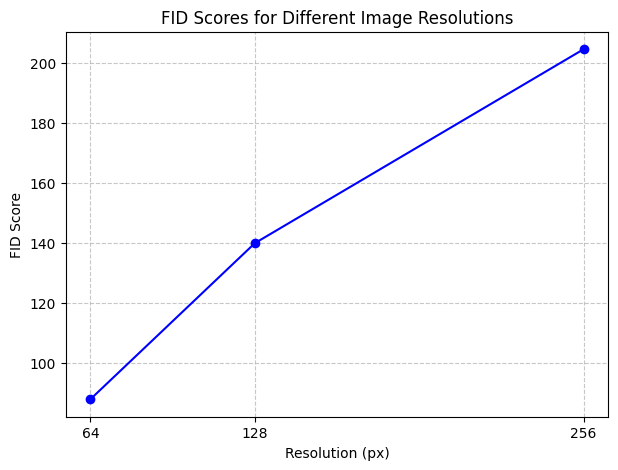

In [3]:
import matplotlib.pyplot as plt

# FID values for each resolution
resolutions = [64, 128, 256]
fid_values = [fid_value_64, fid_value_128, fid_value_256]  # Replace these with your actual FID values

# Plotting the FID scores
plt.figure(figsize=(7, 5))
plt.plot(resolutions, fid_values, marker='o', linestyle='-', color='b')
plt.title('FID Scores for Different Image Resolutions')
plt.xlabel('Resolution (px)')
plt.ylabel('FID Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(resolutions)
plt.show()


In [ ]:
import torch

import sys
sys.path.append('/home/benet/scenic')
from scenic.projects.baselines.clip import model as clip
print("Scenic CLIP model imported successfully!")

sys.path.append('/home/benet/tfg/experiments/brain_generation/evaluation/google-research')
import cmmd.main as cmmd_main
compute_cmmd = cmmd_main.compute_cmmd

dataset1_path_64 = 'generated_images/brain_ddpm_64'
dataset2_path_64 = 'test_images/64'

# Compute CMMD
cmmd_value_64 = compute_cmmd(dataset1_path_64, dataset2_path_64, batch_size=32, max_count=-1)
print(f"CMMD score for 64x64 images: {cmmd_value_64}")


2025-05-12 13:13:56.043707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747048436.066079 1373266 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747048436.072819 1373266 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747048436.089659 1373266 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747048436.089686 1373266 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747048436.089688 1373266 computation_placer.cc:177] computation placer alr

Scenic CLIP model imported successfully!


Calculating embeddings for 240 images from generated_images/brain_ddpm_64.


I0000 00:00:1747048450.163875 1373266 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2556 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1
I0000 00:00:1747048450.164476 1373266 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 1812 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1
I0000 00:00:1747048450.164971 1373266 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 119 MB memory:  -> device: 2, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:82:00.0, compute capability: 6.1
100%|██████████| 7/7 [04:16<00:00, 36.63s/it]


Calculating embeddings for 234 images from test_images/64.


100%|██████████| 7/7 [03:46<00:00, 32.34s/it]


CMMD score for 64x64 images: 0.5723039507865906


: 

In [ ]:
import os
import sys
from pathlib import Path
from tqdm import tqdm

# Get the absolute path to the PerceptualSimilarity directory
module_path = Path().resolve() / "PerceptualSimilarity"

# Add it to the Python path
sys.path.append(str(module_path))

# Now you can import lpips
import lpips

dataset1_path_64 = 'generated_images/brain_ddpm_64'
dataset2_path_64 = 'test_images/64'
out = 'evaluation_results/lpips_64.txt'

loss_fn = lpips.LPIPS(net='alex',version='0.1').cuda()

# crawl directories
f = open(out,'w')
files_1 = os.listdir(dataset1_path_64)
files_2 = os.listdir(dataset2_path_64)
# Initialize variables for accumulation
distances = []

# Compute distances with tqdm progress bar
for file1 in tqdm(files_1, desc="Computing LPIPS distances"):
    for file2 in files_2:
        img1 = lpips.im2tensor(lpips.load_image(os.path.join(dataset1_path_64, file1))).cuda()
        img2 = lpips.im2tensor(lpips.load_image(os.path.join(dataset2_path_64, file2))).cuda()
        dist = loss_fn(img1, img2)
        distances.append(dist.item())

# Convert to tensor for easier computation
distances_tensor = torch.tensor(distances)
avg_dist = distances_tensor.mean().item()
std_dist = distances_tensor.std().item()

print(f'Average LPIPS distance for 64x64 images: {avg_dist}')
f.write(f'Average LPIPS distance for 64x64 images: {avg_dist}\n')

f.close()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/benet/anaconda3/envs/benetvicorob/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/benet/anaconda3/envs/benetvicorob/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/benet/tfg/experiments/brain_generation/evaluation/PerceptualSimilarity/lpips/weights/v0.1/alex.pth


Computing LPIPS distances:   3%|▎         | 8/240 [00:08<03:58,  1.03s/it]


KeyboardInterrupt: 

: 

In [ ]:

dataset1_path_64 = 'generated_images/brain_ddpm_64'
dataset2_path_64 = 'test_images/64'

# Compute CMMD
cmmd_value_64 = compute_cmmd(dataset1_path_64, dataset2_path_64, batch_size=32, max_count=-1)
print(f"CMMD score for 64x64 images: {cmmd_value_64}")


ERROR:absl:Could not import torch for CLIP checkpoint conversion


UnboundLocalError: cannot access local variable 'torch' where it is not associated with a value